In [24]:
# Importing Data Manipulation Library
import pandas as pd
import numpy as np
# Importing Data Visualization Library
import seaborn as sns
import matplotlib.pyplot as plt
# Import FilterWarnings Library
import warnings
warnings.filterwarnings('ignore')

In [25]:
# Importing Scikit Learn Libararies
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [26]:
# Import Logging
import logging
logging.basicConfig(level = logging.INFO,
                    filename = 'model.log',
                    format = '%(asctime)s) - %(levelname)s - %(message)s',
                    filemode = 'w')
logging.info('Model Started')

In [27]:
# Import data using pandas function

df = pd.read_csv('C:\EnE_Bank_Loan_Approval_ML_Model\ml_project\data\loan_data (1).csv')
df.sample(frac = 1)

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
7360,24.0,male,Master,88300.0,0,RENT,6500.0,DEBTCONSOLIDATION,11.01,0.07,4.0,703,Yes,0
39635,22.0,female,High School,70698.0,0,RENT,10000.0,EDUCATION,11.08,0.14,4.0,565,Yes,0
41144,31.0,female,High School,240810.0,9,MORTGAGE,25000.0,HOMEIMPROVEMENT,12.77,0.10,9.0,609,Yes,0
37406,24.0,male,Bachelor,34338.0,0,RENT,7075.0,PERSONAL,8.90,0.21,3.0,646,Yes,0
13314,25.0,male,Master,108846.0,2,MORTGAGE,6000.0,MEDICAL,11.01,0.06,4.0,711,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26557,33.0,female,Associate,126675.0,10,MORTGAGE,5150.0,PERSONAL,12.41,0.04,9.0,696,Yes,0
37065,28.0,male,Associate,61313.0,4,RENT,2185.0,PERSONAL,11.45,0.04,8.0,664,Yes,0
161,24.0,female,Associate,72608.0,3,RENT,25000.0,PERSONAL,10.99,0.34,3.0,612,No,1
5675,24.0,female,Bachelor,97484.0,0,RENT,5000.0,MEDICAL,11.01,0.05,3.0,591,No,1


In [28]:
logging.info('Data Ingestion Process Begins...')

In [29]:
# Checking dataset information :
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

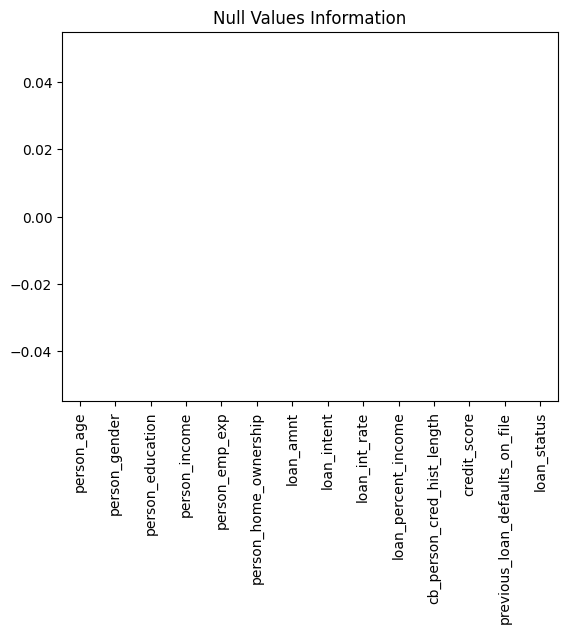

In [30]:
df.isnull().sum().plot(kind = 'bar',cmap = 'viridis')
plt.title('Null Values Information')
plt.show()

In [31]:
# Split the dataset into Categorical and Numerical

numerical_col= df.select_dtypes(include = ['int64','float64'])
categorical_col = df.select_dtypes(include = 'object')

In [32]:
from sklearn.preprocessing import LabelEncoder


for i in categorical_col.columns:
    le = LabelEncoder()
    df[i] = le.fit_transform(df[i])

df

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,0,4,71948.0,0,3,35000.0,4,16.02,0.49,3.0,561,0,1
1,21.0,0,3,12282.0,0,2,1000.0,1,11.14,0.08,2.0,504,1,0
2,25.0,0,3,12438.0,3,0,5500.0,3,12.87,0.44,3.0,635,0,1
3,23.0,0,1,79753.0,0,3,35000.0,3,15.23,0.44,2.0,675,0,1
4,24.0,1,4,66135.0,1,3,35000.0,3,14.27,0.53,4.0,586,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,1,0,47971.0,6,3,15000.0,3,15.66,0.31,3.0,645,0,1
44996,37.0,0,0,65800.0,17,3,9000.0,2,14.07,0.14,11.0,621,0,1
44997,33.0,1,0,56942.0,7,3,2771.0,0,10.02,0.05,10.0,668,0,1
44998,29.0,1,1,33164.0,4,3,12000.0,1,13.23,0.36,6.0,604,0,1


In [33]:
# EDA (Exploratory Data Analysis) :
# 1. Univariate Analysis

'''
step 1 : Create a Blank List: Stats[]
step 2 : Create Dictionary using orderDict
step 3 : convert stats[] i.e. List into DataFrame

'''
from collections import OrderedDict as orderedDict

stats = []

for i in numerical_col.columns:
  numerical_stats = orderedDict({
       'Feature':i,
       'count':df[i].count(),
       'Minimum':df[i].min(),
       'Maximum':df[i].max(),
       'Mean':df[i].mean(),
       'Median':df[i].median(),
       'Minimum':df[i].min(),
       'Q1':df[i].quantile(0.25),
       'Q3':df[i].quantile(0.75),
       'IQR':df[i].quantile(0.75)-df[i].quantile(0.25),
       'Skewness':df[i].skew(),
       'Kurtosis':df[i].kurtosis(),
})
  stats.append(numerical_stats)
  report = pd.DataFrame(stats)
report


,Feature,count,Minimum,Maximum,Mean,Median,Q1,Q3,IQR,Skewness,Kurtosis
0,person_age,45000,20.00,144.00,27.764178,26.00,24.00,30.00,6.00,2.548154,18.649449
1,person_income,45000,8000.00,7200766.00,80319.053222,67048.00,47204.00,95789.25,48585.25,34.137583,2398.684769
2,person_emp_exp,45000,0.00,125.00,5.410333,4.00,1.00,8.00,7.00,2.594917,19.168324
3,loan_amnt,45000,500.00,35000.00,9583.157556,8000.00,5000.00,12237.25,7237.25,1.179731,1.351215
4,loan_int_rate,45000,5.42,20.00,11.006606,11.01,8.59,12.99,4.40,0.213784,-0.420335
5,loan_percent_income,45000,0.00,0.66,0.139725,0.12,0.07,0.19,0.12,1.034512,1.082416
6,cb_person_cred_hist_length,45000,2.00,30.00,5.867489,4.00,3.00,8.00,5.00,1.631720,3.725945
7,credit_score,45000,390.00,850.00,632.608756,640.00,601.00,670.00,69.00,-0.610261,0.203022
8,loan_status,45000,0.00,1.00,0.222222,0.00,0.00,0.00,0.00,1.336351,-0.214176


<Axes: >

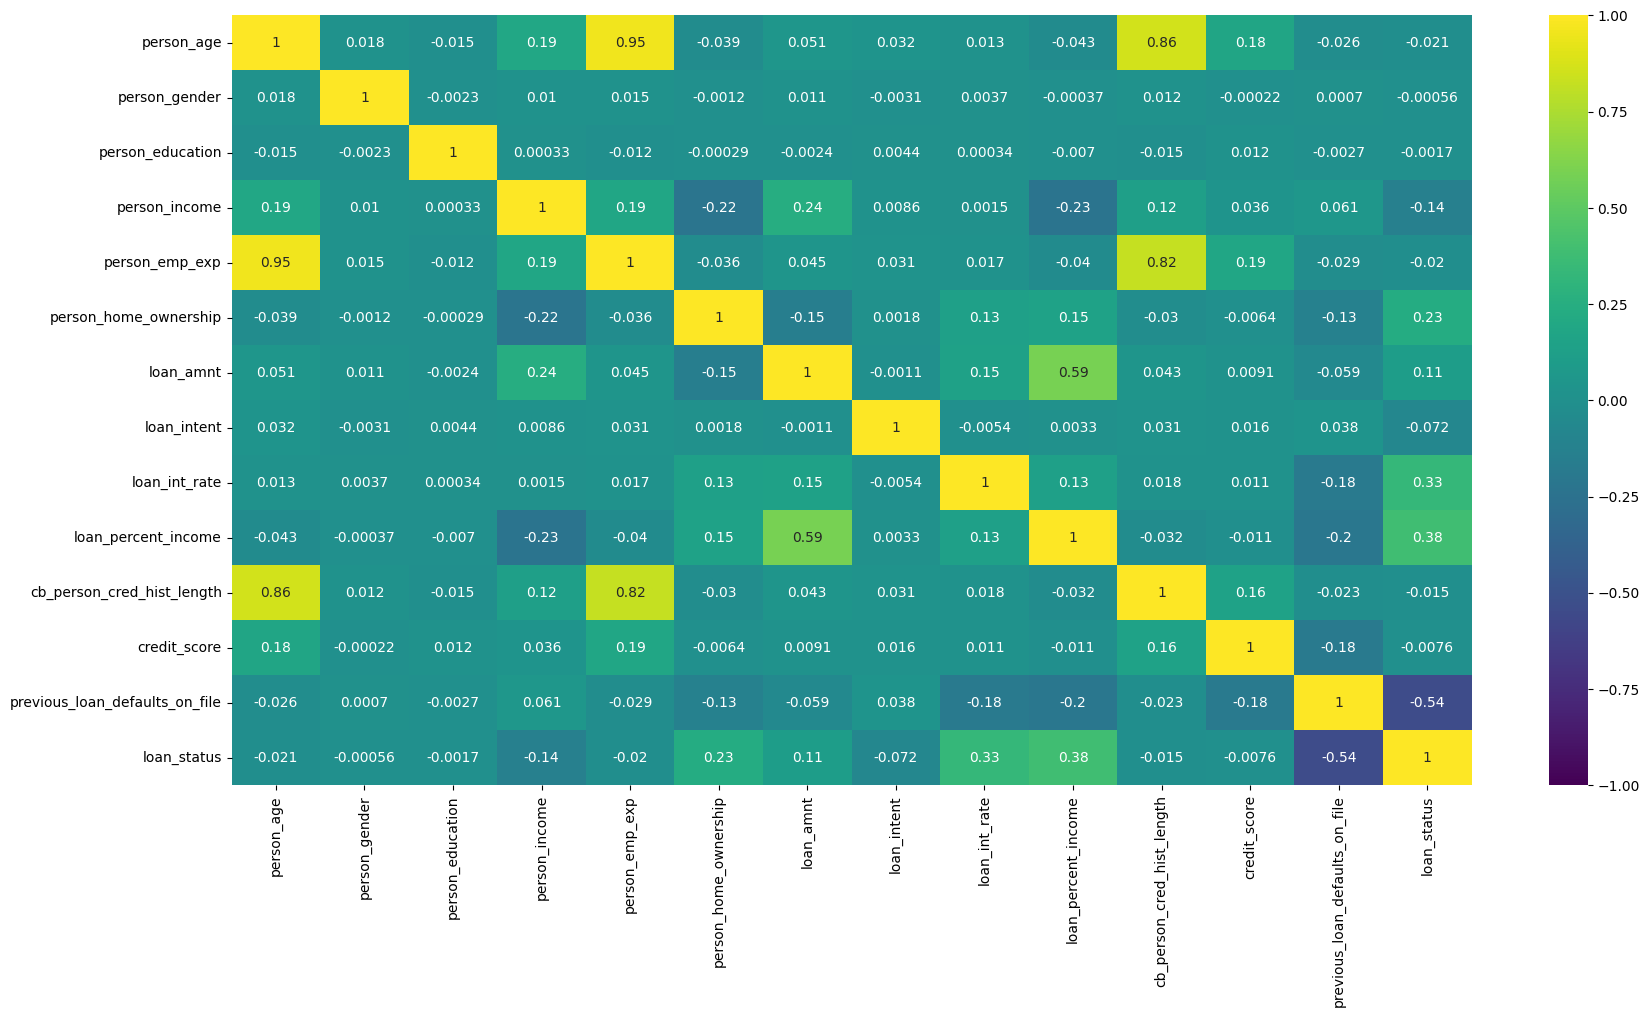

In [34]:
# Checking Heatmap
import seaborn as sns
import matplotlib.pyplot as plt 

plt.figure(figsize= (20,10))
sns.heatmap(df.corr(),annot = True,vmin = -1,vmax = 1, center =0,cmap = 'viridis')

In [35]:
# Checking Balancing of Target Columns
df['loan_status'].value_counts()

loan_status
0    35000
1    10000
Name: count, dtype: int64

In [36]:
# Step 1: Split the data into x and y 

X = df.drop(columns = 'loan_status',axis = 1)
y = df['loan_status']

# Step 2: Split the dataset into train and test

X_train,X_test,y_train,y_test = train_test_split(X,y,train_size= 0.70,random_state= 42)

# Step 3: Using Imblearn Technique:
from imblearn.over_sampling import SMOTE
sm= SMOTE()
X_train,y_train = sm.fit_resample(X_train,y_train)

y_train.value_counts()

loan_status
1    24506
0    24506
Name: count, dtype: int64

In [37]:
# Step 4: Using Scaling Technique
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [38]:
# Step 5: Model Building
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier().fit (X_train,y_train)
y_pred_RF = RF.predict(X_test)

In [39]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier().fit(X_train,y_train)
y_pred_DT = DT.predict(X_test)
print(f'The Model accuracy for DecisionTress Classifier is', accuracy_score(y_test,y_pred_DT))

The Model accuracy for DecisionTress Classifier is 0.8766758017924599


In [40]:
# Support Vector Machines
from sklearn import svm
svm=svm.SVC()
svm.fit(X_train,y_train)

y_pred_svm = svm.predict(X_test)
print(accuracy_score(y_test,y_pred_svm))

0.8691208058662321


In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

models = {'LogisticRegression':LogisticRegression(),
          'RandomForestClassifier':RandomForestClassifier(),
          'KNNClassifier':KNeighborsClassifier(),
          'DecisionTreeClassifier': DecisionTreeClassifier()}

def evaluate(models,X_train,X_test,y_train,y_test):
    np.random.seed(42)
    # Creating One Dictionary to Save Model Score
    model_score = {}
    for name,model in models.items():
        model.fit(X_train, y_train)
        model_score[name] = model.score(X_test,y_test)
    return model_score


model_score = evaluate(models = models ,X_train = X_train,X_test = X_test,y_train = y_train,y_test = y_test)
model_score

{'LogisticRegression': 0.8591956151396193,
 'RandomForestClassifier': 0.9044515221094733,
 'KNNClassifier': 0.8609732612399081,
 'DecisionTreeClassifier': 0.878897859417821}